<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** José de Jesús Carbajal Castellanos

**Fecha:** 9 de marzo del 2025.

**Expediente** : XXX.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Link con el enlace del repositorio del creador del proyecto

# Tarea X: Clase X

# <font color= red>  Tarea  </font>

Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:

https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [70]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Precio de las viviendas

In [71]:
#Lectura, procesado y separación de los datos
df = pd.read_csv('data/Housing.csv')

X = df.drop(columns=['price'])
y = df['price']


categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])
X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [72]:
modelnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Capa de salida para regresión
])

modelnn.compile(optimizer='adam', loss='mse', metrics=['mae'])


#Ejecución y evaluación
history = modelnn.fit(X_train, y_train, epochs=400, batch_size=16, validation_data=(X_test, y_test))
y_pred = modelnn.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)

print(f'R² Score: {r2:.4f}')

Epoch 1/400


/home/pepechuy/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 25350664880128.0000 - mae: 4706041.5000 - val_loss: 30129914904576.0000 - val_mae: 5007529.0000
Epoch 2/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26912143441920.0000 - mae: 4844539.5000 - val_loss: 30129363353600.0000 - val_mae: 5007474.5000
Epoch 3/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25376440975360.0000 - mae: 4713335.5000 - val_loss: 30126494449664.0000 - val_mae: 5007193.0000
Epoch 4/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24827421261824.0000 - mae: 4657726.5000 - val_loss: 30116369399808.0000 - val_mae: 5006208.0000
Epoch 5/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27181239500800.0000 - mae: 4881184.0000 - val_loss: 30089393733632.0000 - val_mae: 5003603.0000
Epoch 6/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25879382065152.0000 - mae: 4753138.0000 - val_loss: 30030981758976.0000 - val_mae: 4997955.0000
Epoch 7/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26065030348800.0000 - m

In [73]:
#Reshape y definición de la red
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Dfine arch
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # ooutput layer for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/home/pepechuy/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
#Ejecución y evaluación
history = model.fit(X_train, y_train, epochs=400, batch_size=16, validation_data=(X_test, y_test))
y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)

print(f'R² Score: {r2:.4f}')

Epoch 1/400


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 25139601211392.0000 - mae: 4700929.0000 - val_loss: 30129776492544.0000 - val_mae: 5007515.5000
Epoch 2/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24667553267712.0000 - mae: 4638665.5000 - val_loss: 30128274931712.0000 - val_mae: 5007369.5000
Epoch 3/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25184354435072.0000 - mae: 4703478.0000 - val_loss: 30121866035200.0000 - val_mae: 5006751.0000
Epoch 4/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27704680251392.0000 - mae: 4917839.5000 - val_loss: 30102742106112.0000 - val_mae: 5004911.5000
Epoch 5/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25941535358976.0000 - mae: 4771417.5000 - val_loss: 30056703328256.0000 - val_mae: 5000495.5000
Epoch 6/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23983625863168.0000 - mae: 4580081.0000 - val_loss: 29963497504768.0000 - val_mae: 4991559.5000
Epoch 7/400
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25615124135936.0000 - m

# Electricity

In [75]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

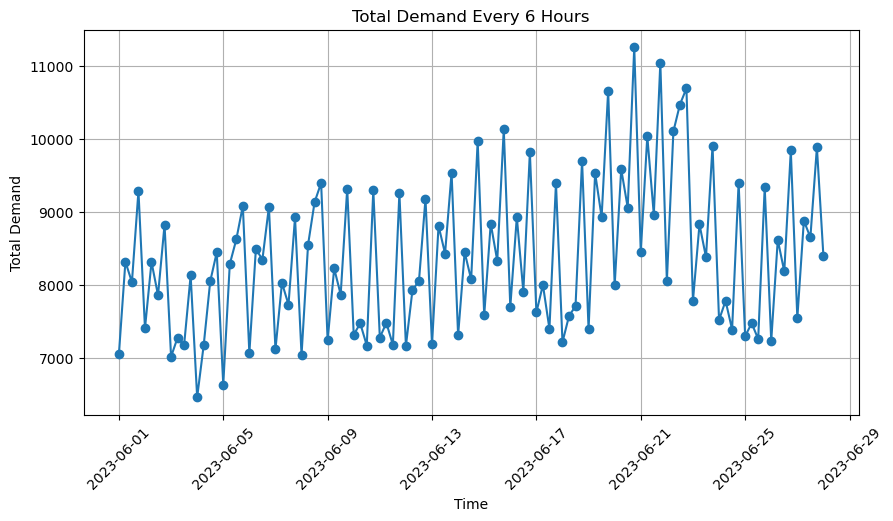

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("data/electricity/PRICE_AND_DEMAND_202306_NSW1.csv", parse_dates=['SETTLEMENTDATE'])

# Set datetime index
df.set_index('SETTLEMENTDATE', inplace=True)

# Resample data every 6 hours and aggregate (mean or sum)
df_6h = df['TOTALDEMAND'].resample('6H').mean()  # Use .sum() if needed

# Plot TOTALDEMAND per 6 hours
plt.figure(figsize=(10, 5))
plt.plot(df_6h.index, df_6h, marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Total Demand')
plt.title('Total Demand Every 6 Hours')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [77]:
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        if isinstance(sequence, pd.Series):
            seq_x, seq_y = sequence.iloc[i:end_ix], sequence.iloc[end_ix]
        else:
            seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]

        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)


In [78]:
#Resampleamos para cada 6 horas así que un día es cada 4 steps
n_steps = 4
n_features = 1
X, y = split_univariate_sequence(df_6h, 4)

# CNN univariada

<AxesSubplot: >

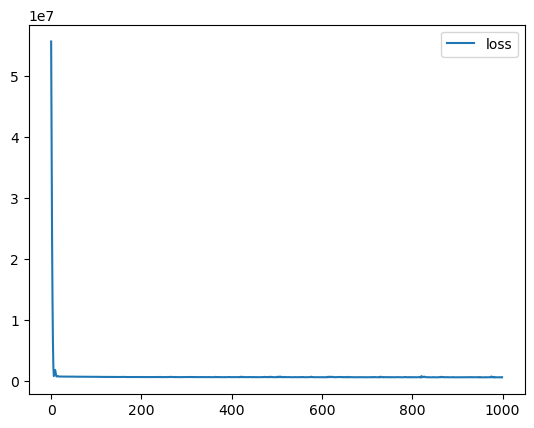

In [79]:
# Definimos nuestro modelo
model_1 = Sequential()
model_1.add(keras.layers.Input(shape=(n_steps, n_features)))
model_1.add(Conv1D(64, 2, activation='relu'))
model_1.add(MaxPooling1D())
model_1.add(Flatten())
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')

X = X.reshape((X.shape[0], X.shape[1], n_features))
history_1 = model_1.fit(X, y, epochs=1000, verbose=False)
pd.DataFrame(history_1.history).plot()

In [80]:
# Probamos nuestro modelo 
x_input = np.array([70, 80, 90, 100])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model_1.predict(x_input, verbose=0)
yhat

array([[76.744385]], dtype=float32)

# Entradas múltiples

In [81]:
import numpy as np

df_6h2 = df['RRP'].resample('6H').mean()

df_6h = df_6h.to_numpy().reshape(-1, 1)
df_6h2 = df_6h2.to_numpy().reshape(-1, 1)

output_seq = (df_6h + df_6h2).reshape(-1, 1)

dataset = np.hstack([df_6h, df_6h2, output_seq])


In [82]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence(sequence: np.ndarray, n_steps: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [83]:
X, y = split_multivariate_sequence(dataset, n_steps)

n_features = X.shape[2]

X.shape, y.shape

((106, 4, 2), (106,))

<AxesSubplot: >

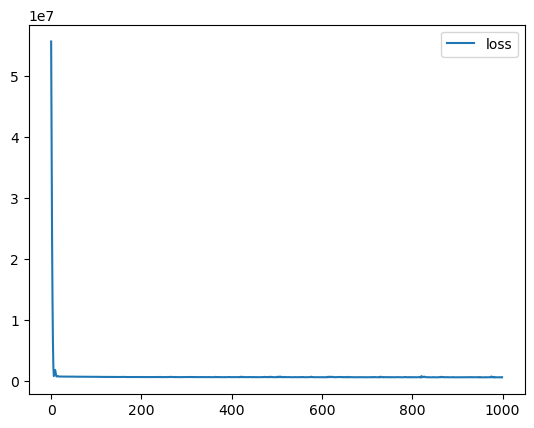

In [84]:
# Definimos nuestro modelo
model_2 = Sequential()
model_2.add(keras.layers.Input(shape=(n_steps, n_features)))
model_2.add(Conv1D(64, 2, activation='relu'))
model_2.add(MaxPooling1D())
model_2.add(Flatten())
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mse')
history_2 = model_2.fit(X, y, epochs=1000, verbose=False)
pd.DataFrame(history_1.history).plot()

In [85]:
# Probamos nuestro modelo 
x_input = np.array([[80, 85], [90, 95], [100, 105], [110, 115]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model_2.predict(x_input, verbose=0)
yhat

array([[88.35654]], dtype=float32)

# Multiple encabezamiento

In [86]:
# Paqueterías faltantes
from keras.models import Model
from keras.layers import concatenate
from keras.utils import plot_model
from keras.layers import Input

In [ ]:
n_steps = X.shape[1]
n_features = X.shape[2]


In [ ]:
# Primer modelo de entrada
visible1 = Input(shape=(n_steps, 1))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)

In [ ]:
# Segundo modelo de entrada
visible2 = Input(shape=(n_steps, 1))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)

In [ ]:
# merge modelos de entrada
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

In [ ]:
# Conectar entradas y salida del modelo
model_3 = Model(inputs=[visible1, visible2], outputs=output)
model_3.compile(optimizer='adam', loss='mse')


In [ ]:
# Prepare the input data
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], 1)  
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], 1)  



In [ ]:
history_3 = model_3.fit([X1, X2], y, epochs=1000, verbose=0)

/home/pepechuy/.local/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_168', 'keras_tensor_172']. Received: the structure of inputs=('*', '*')
  warnings.warn(


<AxesSubplot: >

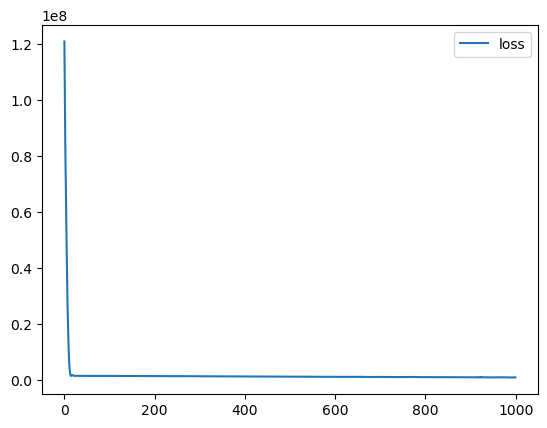

In [94]:
pd.DataFrame(history_3.history).plot()

In [ ]:
print(model_3.evaluate([X1, X2], y))


# Multiples series paralelas

In [96]:
# dividir una secuencia multivariada en muestras para predicción múltiple
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [97]:
X_m, y_m = split_multiple_forecasting_sequence(dataset, n_steps=4)

In [98]:
n_features = X_m.shape[2]

# define model_4
model_4 = Sequential()
model_4.add(keras.layers.Input(shape=(n_steps, n_features)))
model_4.add(Conv1D(64, 2, activation='relu'))
model_4.add(MaxPooling1D())
model_4.add(Flatten())
model_4.add(Dense(50, activation='relu'))
model_4.add(Dense(n_features))
model_4.compile(optimizer='adam', loss='mse')

history_4 = model_4.fit(X_m, y_m, epochs=1000, verbose=0)

<AxesSubplot: >

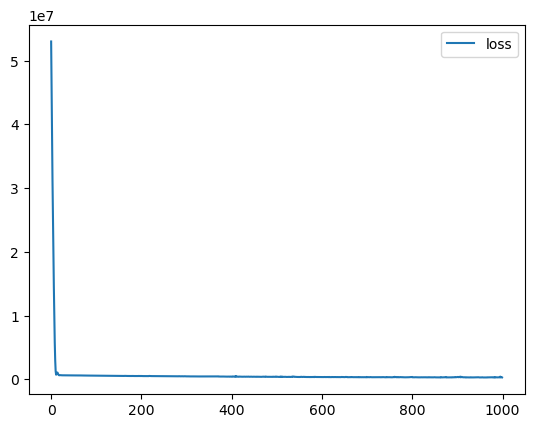

In [99]:
pd.DataFrame(history_4.history).plot()

# Multi output CNN 

In [100]:
# Definimos el modelo
n_features = X_m.shape[2]

visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(64, 2, activation='relu')(visible)
cnn = MaxPooling1D()(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

In [101]:
# Definimos salida 1
output1 = Dense(1)(cnn)
# Definimos salida 2
output2 = Dense(1)(cnn)
# Definimos salida 3
output3 = Dense(1)(cnn)

In [102]:
# Ponemos todo junto
model_5 = Model(inputs=visible, outputs=[output1, output2, output3])
model_5.compile(optimizer='adam', loss='mse')

In [103]:
# Separar salidas
y1 = y_m[:, 0].reshape((y_m.shape[0], 1))
y2 = y_m[:, 1].reshape((y_m.shape[0], 1))
y3 = y_m[:, 2].reshape((y_m.shape[0], 1))

In [104]:
# Ajustar el modelo
history_5 = model_5.fit(X_m, [y1,y2,y3], epochs=500, verbose=0)

<AxesSubplot: >

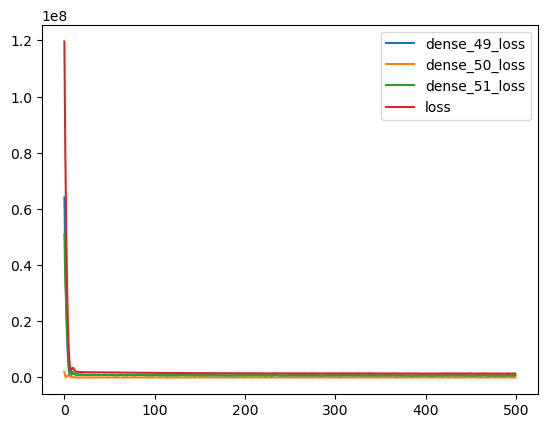

In [105]:
pd.DataFrame(history_5.history).plot()

# CNN de pasos múltiples

In [106]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence_m_step(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [107]:
# Probemos la función creada
# Definir secuencia de entrada
# elegir un número de pasos de tiempo
n_steps_in, n_steps_out = 4, 2 
# Particionar mis datos
X, y = split_univariate_sequence_m_step(df_6h, n_steps_in, n_steps_out)
# Resumir los datos
[print(X[i], y[i]) for i in range(len(X))];

[[7052.4       ]
 [8322.01569444]
 [8042.69180556]
 [9291.34083333]] [[7409.30375   ]
 [8319.50138889]]
[[8322.01569444]
 [8042.69180556]
 [9291.34083333]
 [7409.30375   ]] [[8319.50138889]
 [7863.54527778]]
[[8042.69180556]
 [9291.34083333]
 [7409.30375   ]
 [8319.50138889]] [[7863.54527778]
 [8828.38986111]]
[[9291.34083333]
 [7409.30375   ]
 [8319.50138889]
 [7863.54527778]] [[8828.38986111]
 [7021.44402778]]
[[7409.30375   ]
 [8319.50138889]
 [7863.54527778]
 [8828.38986111]] [[7021.44402778]
 [7284.26944444]]
[[8319.50138889]
 [7863.54527778]
 [8828.38986111]
 [7021.44402778]] [[7284.26944444]
 [7182.22930556]]
[[7863.54527778]
 [8828.38986111]
 [7021.44402778]
 [7284.26944444]] [[7182.22930556]
 [8134.75902778]]
[[8828.38986111]
 [7021.44402778]
 [7284.26944444]
 [7182.22930556]] [[8134.75902778]
 [6467.45375   ]]
[[7021.44402778]
 [7284.26944444]
 [7182.22930556]
 [8134.75902778]] [[6467.45375   ]
 [7179.20958333]]
[[7284.26944444]
 [7182.22930556]
 [8134.75902778]
 [6467.45375 

In [108]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(104, 4, 1)

In [109]:
# Crear nuestro modelo
model_6 = Sequential()
model_6.add(keras.layers.Input(shape=(n_steps, n_features)))
model_6.add(Conv1D(64, 2, activation='relu'))
model_6.add(MaxPooling1D())
model_6.add(Flatten())
model_6.add(Dense(50, activation='relu'))
model_6.add(Dense(n_steps_out))
model_6.compile(optimizer='adam', loss='mse')

In [110]:
# fit model
history_6 = model_6.fit(X, y, epochs=1000, verbose=0)

<AxesSubplot: >

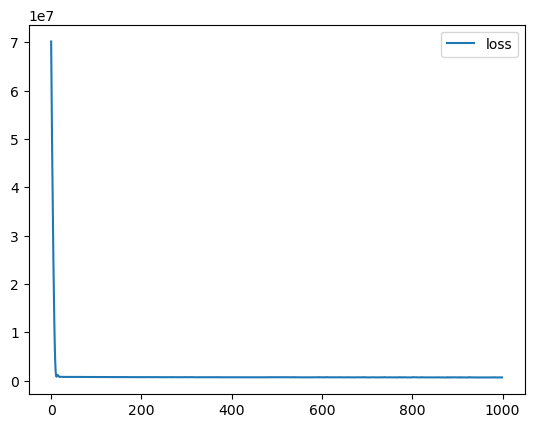

In [111]:
pd.DataFrame(history_6.history).plot()

# serie temporal multivariada

In [112]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [113]:
n_features = X.shape[2]

# Definir el modelo 
model_7 = Sequential()
model_7.add(keras.layers.Input(shape=(n_steps, n_features)))
model_7.add(Conv1D(64, 2, activation='relu'))
model_7.add(MaxPooling1D())
model_7.add(Flatten())
model_7.add(Dense(50, activation='relu'))
model_7.add(Dense(n_steps_out))
model_7.compile(optimizer='adam', loss='mse')
# fit model_7
model_7.fit(X, y, epochs=2000, verbose=0)

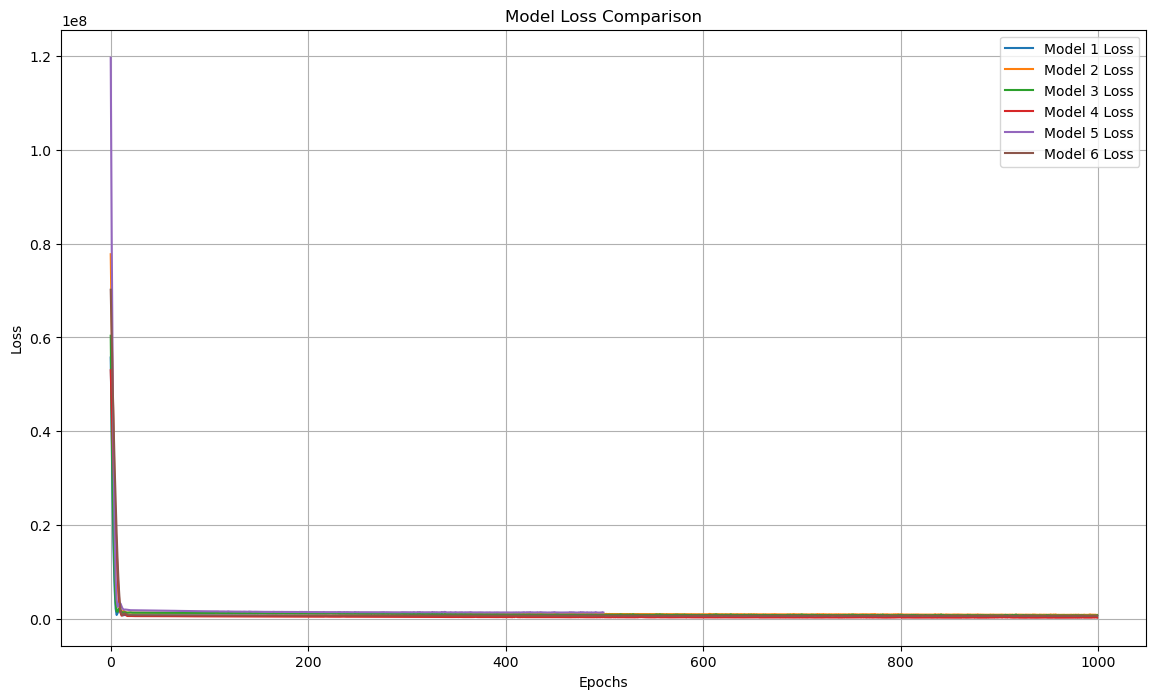

In [114]:
# Create a plot to compare the models
plt.figure(figsize=(14, 8))

# Plot training and validation loss for each model
plt.plot(history_1.history['loss'], label='Model 1 Loss')
plt.plot(history_2.history['loss'], label='Model 2 Loss')
plt.plot(history_3.history['loss'], label='Model 3 Loss')
plt.plot(history_4.history['loss'], label='Model 4 Loss')
plt.plot(history_5.history['loss'], label='Model 5 Loss')
plt.plot(history_6.history['loss'], label='Model 6 Loss')
#plt.plot(history_7.history['loss'], label='Model 7 Loss')

# Add titles and labels
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Investigación de aplicación de una CNN

Para esta actividad seleccionamos el filtro deconvolucional Grad-Cam ya que nos interesa conocer cómo es que las CNN aprenden internamente y en qué features de las imágenes se concentra su atención.   

Este filtro se basa en los gradientes de cada clase con respecto a los mapas de activacción de una capa convolucional específica, se pondneran los gradientes y obtenemos de output un mapa de calor que resalta los pixeles más importantes para la predicción de la clase.    

Grad cam consta de 5 pasos importantes:
1. **Forward propagation (inherente a la red)**
    - Se introduce la imagen y se genera la clase predicha
    - se extraen los mapas de features de una capa específica

2. **Cálculo de los gradientes**
    - Se calcila el gradiente de la probabilidad de la clase objetivo respecto a cada mapa de features
    - esto dará de output que tan sensible es la salida de la red a cambios en el mapa

3. **Cálculo de los Pesos de importancia**
    - Se realiza un promedio espacial de los gradientes sobre la dimensión espacial (i, j) para obtener un peso de importancia para cada filtro de capa

4. **Construcción del Mapa de Calor**
    - Se obtiene el mapa de activación ponderado sumando los mapas de características multiplicados por sus pesos de importancia.
    - Se usa ReLU para eliminar valores negativos, ya que solo nos interesan los features que aportan positivamente a la predicción de la clase

5. **Superposición en la imagen original**
    - Se normaliza el heatmap entre 0 y 1
    - Se redimensiona al tamaño del input
    - se sobreponen las imagenes con una escala de colores



![CBAM Example](https://glassboxmedicine.com/wp-content/uploads/2020/05/example-cbam.png)


![CBAM Example](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSurFfWsEgrboQid-AzdAFDMUQgND28XR8Vhg&s)

En alguna ocasión desarrollé un algoritmo similar (guided backpropagation) para mi clase de Machine Learning, en una de las primeras capas, lo que hizo que los featues que se mostraban eran usualmente sobre la forma del objeto, mostrando que la red en esa capa aprendía en base al contorno o figura de la clase

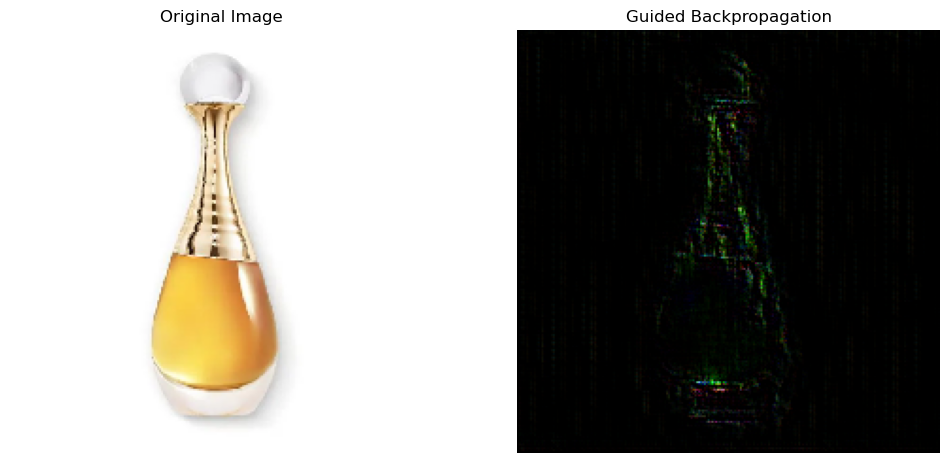

Fuente:
Selvaraju, R. R., Cogswell, M., Das, A., Vedantam, R., Parikh, D., & Batra, D. (2019). Grad-CAM: Visual Explanations from Deep Networks via Gradient-Based Localization. International Journal of Computer Vision, 128(2), 336–359. https://doi.org/10.1007/s11263-019-01228-7